In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [37]:
data = pd.read_csv('train.csv')

In [38]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [39]:
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
data = data.dropna()

In [40]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [41]:
Y = data['Survived']
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [42]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6465116279069767

In [47]:
data = pd.read_csv('train.csv')
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex']]
(data.isna().mean() * 100).round(2)

Survived     0.00
Pclass       0.00
Age         19.87
SibSp        0.00
Parch        0.00
Sex          0.00
dtype: float64

In [48]:
le = LabelEncoder()
le.fit( data['Sex'] )
data['Sex'] = le.transform( data['Sex'] )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Sex       891 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 38.4 KB


In [49]:
data['Age'].fillna(data.groupby(['Sex', 'Pclass'])['Age'].transform('median'), inplace = True)
data

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1
...,...,...,...,...,...,...
886,0,2,27.0,0,0,1
887,1,1,19.0,0,0,0
888,0,3,21.5,1,2,0
889,1,1,26.0,0,0,1


<AxesSubplot:>

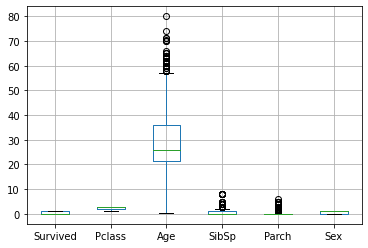

In [50]:
data.boxplot()

In [51]:
Y = data['Survived']
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Sex']]

In [52]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8283582089552238

## Выводы: 
### 1) Для построения модели не использовались бесполезные признаки по типу номера кабины, места посадки и т.д., так как логически эти признаки не могут влиять фактор выживаемости. Во второй части работы, когда пропущенные значения заполнялись по какому-то правилу, не все категориальные признаки выбрасывались, метрика качества стала равна 0.823 против 0.6465 в первом случае. Значит, работа была проделана не зря, и работа с проблемными данными имеет смысл.
### 2) Работа с данными при построении моделей вполне целесообразна, так как позволяет сохранить данные с самостоятельно заполненными пропусками для одного из признаков, вместо их удаления. Это позволяет в какой-то мере сохранить обширность выборки по сравнению с очищенными путём удаления пропусков данными, что негативно влияет на точность модели.
### 3) Я считаю, что на вопрос об однозначной целесообразности подобного исследования для действительно больших данных нельзя сказать так однозначно. Для заполнения реально больших данных понадобится больше времени на первичный условно говоря анализ, вычислительные процессы и т.д. Всё зависит от самих данных: если при обычном удалении данных с пропусками каждая представленная группа(категория) в данных всё равно будет представлена  в достаточном количестве, их соотношение примерно равно и общее количество не сильно уступает изначальному, то заполнение не имеет смысла. Если же количество данных сильно сократилось, или какая-то группа почти полностью исчезла из выборки и нарушилось соотношение, то подобную работу однозначно стоит делать. Для выбора одной из двух стратегий обязателен первичный анализ представленных данных.